#### 1. Importando as biblotecas necessárias

In [119]:
import pandas as pd
import pandasql as ps
import numpy as np
import seaborn as sb
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import sys
import warnings
import jupyterthemes
import  matplotlib.pyplot as plt

#### 2. Analisando os dados das barragens 

In [11]:
#Nomeando o caminho do arquivo em CSV
file = r'C:\Users\Ana Carolina Meliti\Downloads\archive\database_versao_LatLongDecimal_fonteANM_23_01_2019.csv'

In [12]:
#Puxando o arquivo para leitura e visualização com Pandas, dando outros tipos para algumas colunas por conta da leitura.
df = pd.read_csv(file, decimal=",", sep=",",
                       dtype={"CPF_CNPJ":"string",
                             "LATITUDE":"string",
                             "LONGITUDE":"string",
                             "NOME_DO_EMPREENDEDOR":"string",
                             "ALTURA_ATUAL_metros":"string",
                             "VOLUME_ATUAL_m3":"string"})
df.head(3)

,NOME_BARRAGEM_MINERACAO,NOME_DO_EMPREENDEDOR,CPF_CNPJ,POSICIONAMENTO,UF,MUNICIPIO,MINERIO_PRINCIPAL,ALTURA_ATUAL_metros,VOLUME_ATUAL_m3,CATEGORIA_DE_RISCO,DANO_POTENCIAL_ASSOCIADO,CLASSE,INSERIDA_NA_PNSB,LATITUDE,LONGITUDE
0,0-1,Mineração Taboca S.a.,34.019.992/0001-10,Sul do Equador,AM,PRESIDENTE FIGUEIREDO,Minério de Estanho Primário,22.00,"27,700,000.00",Baixa,Média,C,Sim,0.733361111111111,-60.1383888888889
1,103 (Cruz),Mineração Taboca S.a.,34.019.992/0001-10,Sul do Equador,AM,PRESIDENTE FIGUEIREDO,Minério de Estanho Primário,10.30,"924,000.00",Baixa,Média,C,Sim,0.785722222222222,-60.1419166666667
2,111 (Índio),Mineração Taboca S.a.,34.019.992/0001-10,Sul do Equador,AM,PRESIDENTE FIGUEIREDO,Minério de Estanho Primário,5.00,"48,873.00",Baixa,Média,C,Sim,0.789666666666667,-60.1442777777778


In [13]:
#Transformando algumas informações em númericas novamente para realizarmos alguns gráficos e trocando alguns pontos.

df["ALTURA_ATUAL_metros"] = df["ALTURA_ATUAL_metros"].str.replace(",", "")
df["ALTURA_ATUAL_metros"] = df["ALTURA_ATUAL_metros"].replace("-",np.nan)
df["ALTURA_ATUAL_metros"] = pd.to_numeric(df["ALTURA_ATUAL_metros"])


df["VOLUME_ATUAL_m3"] = df["VOLUME_ATUAL_m3"].str.replace(",", "")
df["VOLUME_ATUAL_m3"] = df["VOLUME_ATUAL_m3"].replace("-", np.nan)
df["VOLUME_ATUAL_m3"] = pd.to_numeric(df["VOLUME_ATUAL_m3"])


In [14]:
#Verificando as informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   NOME_BARRAGEM_MINERACAO   714 non-null    object 
 1   NOME_DO_EMPREENDEDOR      714 non-null    string 
 2   CPF_CNPJ                  714 non-null    string 
 3   POSICIONAMENTO            714 non-null    object 
 4   UF                        714 non-null    object 
 5   MUNICIPIO                 714 non-null    object 
 6   MINERIO_PRINCIPAL         714 non-null    object 
 7   ALTURA_ATUAL_metros       697 non-null    Float64
 8   VOLUME_ATUAL_m3           707 non-null    Float64
 9   CATEGORIA_DE_RISCO        390 non-null    object 
 10  DANO_POTENCIAL_ASSOCIADO  390 non-null    object 
 11  CLASSE                    390 non-null    object 
 12  INSERIDA_NA_PNSB          714 non-null    object 
 13  LATITUDE                  714 non-null    string 
 14  LONGITUDE 

#### 3.Analise de dados(verificando outras maneiras de ver valores "missing")

Text(0.5, 1.0, 'Análise de Missings: Dataset ANM Barragens')

Text(0.5, 0, 'Missing em %')

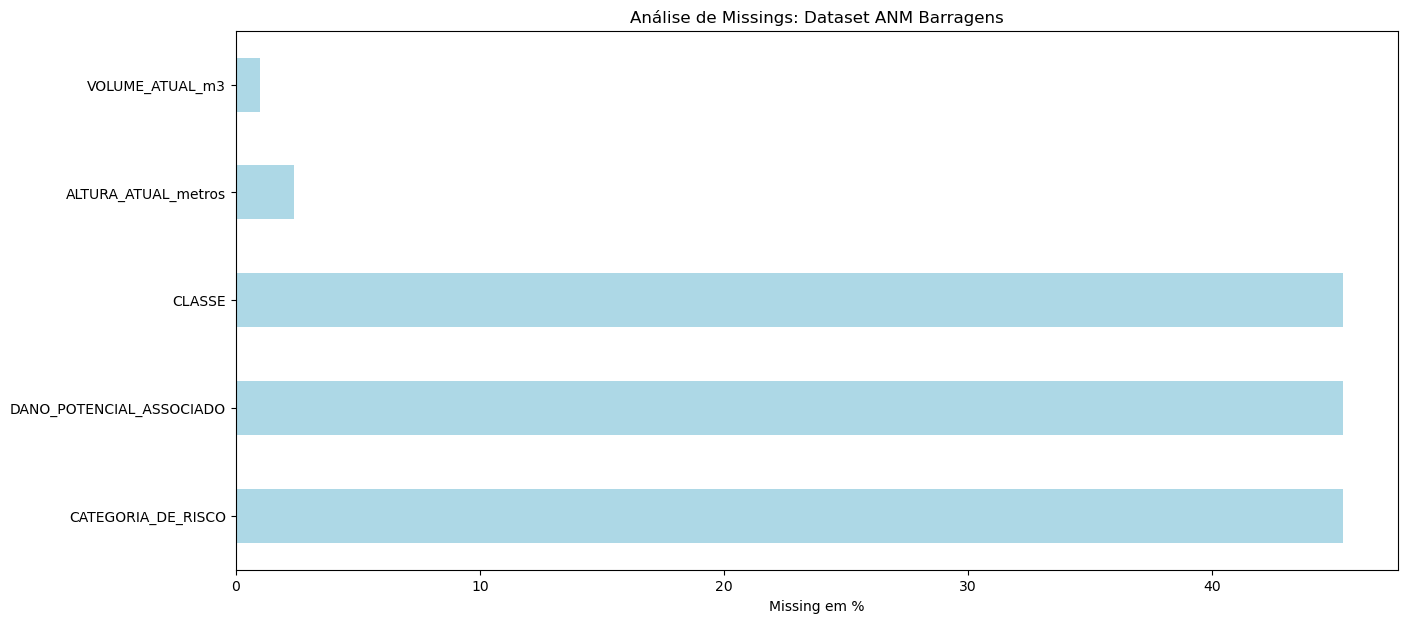

In [155]:
#Plotando em gráfico a analise de valores missing
#ISNA trás a contagem de missing, ele é um booleano, ou seja, tudo que for missing, o isna faz a contagem

n_cols = [col for col in df if(df[col].isna().sum() > 0)]
ax = (
df[n_cols]
.isna()
.mean() #média/percentual de missing
.sort_values(ascending=False) #ordenando do maior para o menor
.mul(100) #trazendo para centenas
.plot(kind="barh", figsize=(15,7), color='lightblue')
)
ax.set_title("Análise de Missings: Dataset ANM Barragens")
ax.set_xlabel("Missing em %")
plt.savefig('Missing.png')

In [16]:
#Verificando a coluna de Categoria de Risco onde há uma concetração grande de missing
df[df["CATEGORIA_DE_RISCO"].isna()].describe()

,ALTURA_ATUAL_metros,VOLUME_ATUAL_m3
count,307.0,317.0
mean,6.961922,141710.368675
std,3.739758,281365.593062
min,1.0,0.01
25%,4.0,5250.0
50%,6.2,20000.0
75%,10.0,140059.0
max,14.9,1965306.0


Analisando junto com o André Yukio, ele identificou que há alguns critérios na politica do PNSB.
Barragens menores que 15 metros não se enquadram na classificação da política nacional de segurança de barragens (PNSB)

Os critérios são: 
Altura >= 15 metros
Volume >= 3 milhões m³
Resídup = Perigoso
Dano Potencial Associado = Médio ou Alto

fonte: https://www.planalto.gov.br/ccivil_03/_ato2007-2010/2010/lei/l12334.htm

Como a analise guiada foi há 2 anos, procurei para saber se havia mudado alguma questão nos critérios, mas eles permanecem os mesmos. 

Para complementar nossa analise resolvi procurar quem é que realiza esse tipo de analise de resíduo para determina se é perigoso, e coletei algumas informações como:

A avaliação é feita por agências reguladoras, têm a responsabilidade de regular e supervisionar a construção, operação e segurança das barragens. Elas frequentemente colaboram com especialistas para avaliar os riscos associados a danos residuais e impor regulamentos para minimizar esses riscos.

Especialistas em Engenharia: Engenheiros especializados em geotecnia, hidrologia, hidráulica e outras áreas relacionadas são fundamentais para avaliar os aspectos técnicos da segurança de barragens e determinar o potencial dano residual em caso de falha.

Equipes de Avaliação de Risco: Essas equipes multidisciplinares incluem profissionais de várias áreas, como engenharia, geologia, ecologia e gestão de desastres. Eles colaboram para avaliar a probabilidade de falha da barragem, os impactos potenciais e o dano residual resultante.

Comunidades Locais e Ambientalistas: A participação das comunidades locais afetadas e das partes interessadas é importante na avaliação de danos residuais. Suas preocupações e perspectivas devem ser consideradas ao avaliar os riscos e determinar os potenciais impactos.

Instituições de Pesquisa e Acadêmicas: Instituições acadêmicas e de pesquisa frequentemente conduzem estudos independentes para avaliar riscos, danos potenciais e estratégias de mitigação.

E os critérios levado em consideração para uma boa testagem são:

Toxicidade: Avalia-se a capacidade do resíduo de causar danos à saúde humana ou ao meio ambiente. Isso pode envolver testes para determinar a presença e a concentração de substâncias químicas tóxicas.

Inflamabilidade: A capacidade do resíduo de entrar em ignição e queimar facilmente é um critério importante. Isso é especialmente relevante para resíduos que podem causar incêndios ou explosões.

Reatividade: Alguns resíduos podem ser reativos e causar reações químicas perigosas quando em contato com outros materiais ou condições específicas.

Corrosividade: Resíduos corrosivos podem danificar materiais e infraestrutura, bem como causar lesões à saúde humana.

Biodegradabilidade: A capacidade do resíduo de se decompor naturalmente e ser absorvido pelo meio ambiente pode ser um critério para determinar se é considerado perigoso.

Persistência: Alguns resíduos podem permanecer no meio ambiente por um longo período de tempo, o que pode aumentar seu potencial de acumulação e impacto ambiental.

Solubilidade: A solubilidade do resíduo em água pode influenciar sua capacidade de se espalhar e contaminar recursos hídricos.

Efeitos sobre a saúde humana e o meio ambiente: As agências reguladoras avaliam os impactos potenciais do resíduo na saúde das pessoas, em ecossistemas e na vida selvagem.

Normas e Regulamentações: As agências reguladoras baseiam suas avaliações em regulamentos e normas específicos relacionados a resíduos perigosos. Esses regulamentos podem variar de acordo com o país ou região.

Classificação de Resíduos: Muitas vezes, os resíduos são classificados em categorias com base em critérios específicos. Essa classificação pode determinar se um resíduo é considerado perigoso ou não.

Porém não é algo que seja fixado, eles são atualizado conforme o que for demandado. 


#### 4. Verificando as maiores e onde há a maior concentração de barragens por UF
Utilizando o PandaSQL para me auxiliar com as querys e o Matplolib para colocar os gráficos

Em minha analise identifiquei que MG é o estado que possui maior concentração de barragens, tendo 38,7% do total.

E fui atrás para entender porque há tantas barragens concentradas em Minas Gerais.

Recursos Naturais: Minas Gerais é um estado brasileiro com abundância de recursos naturais, incluindo minerais e água. Devido à presença de recursos minerais, a mineração é uma atividade econômica importante na região, o que pode resultar na construção de muitas barragens para armazenar rejeitos de mineração, água e resíduos.

Mineração: A mineração é uma das principais atividades econômicas em Minas Gerais. A extração de minerais, como minério de ferro, ouro, nióbio e outros, muitas vezes requer a construção de barragens para conter rejeitos de mineração e água utilizada no processo.

Abastecimento de Água: Devido à sua grande extensão territorial e variações climáticas, a gestão de recursos hídricos é fundamental em Minas Gerais. Barragens são frequentemente construídas para armazenar água para abastecimento humano, irrigação agrícola e geração de energia hidrelétrica.

Geração de Energia: O estado abriga usinas hidrelétricas importantes que geram energia a partir do fluxo de água em rios. Isso resulta na construção de barragens para represar água e criar quedas d'água controladas para acionar turbinas e gerar eletricidade.

Geografia e Hidrografia: A geografia de Minas Gerais é marcada por vales e rios, o que pode favorecer a construção de barragens para diversos fins, como irrigação, abastecimento e contenção de cheias.

Urbanização e Infraestrutura: O crescimento urbano e a expansão da infraestrutura podem exigir o gerenciamento das águas pluviais, prevenção de enchentes e tratamento de resíduos líquidos. Barragens de contenção e tratamento podem ser necessárias para enfrentar esses desafios.

É importante destacar que a construção e o gerenciamento de barragens também podem ser acompanhados de desafios ambientais, sociais e de segurança. As razões acima são fatores gerais que podem contribuir para o grande número de barragens em Minas Gerais, mas cada barragem pode ter uma história e propósito específicos.


In [85]:
query = '''SELECT NOME_BARRAGEM_MINERACAO, ALTURA_ATUAL_metros, VOLUME_ATUAL_m3, UF
FROM df
ORDER BY ALTURA_ATUAL_metros DESC
LIMIT 10 '''

df_maiores = ps.sqldf(query,locals())
df_maiores

,NOME_BARRAGEM_MINERACAO,ALTURA_ATUAL_metros,VOLUME_ATUAL_m3,UF
0,Barragem de Germano,163.00,129590000.0,MG
1,Barragem Santo Antônio,104.00,399058945.0,MG
2,Forquilha IV,100.00,4108399.6,MG
3,Campo Grande,99.30,22978889.0,MG
4,Forquilha I,98.28,12042671.0,MG
5,Maravilhas II,97.92,91925622.0,MG
6,Forquilha II,95.76,20862740.0,MG
7,Barragem Eustáquio,94.00,148349348.0,MG
8,Barragem BL-1,91.00,170000000.0,MG
9,CONTENÇÃO DE REJEITOS DE CUIABÁ,90.00,7429355.0,MG


<Figure size 1000x600 with 0 Axes>

<BarContainer object of 10 artists>

Text(0.5, 0, 'Altura em metros')

Text(0.5, 1.0, '10 maiores barragens')

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120'),
  Text(140.0, 0, '140'),
  Text(160.0, 0, '160'),
  Text(180.0, 0, '180')])

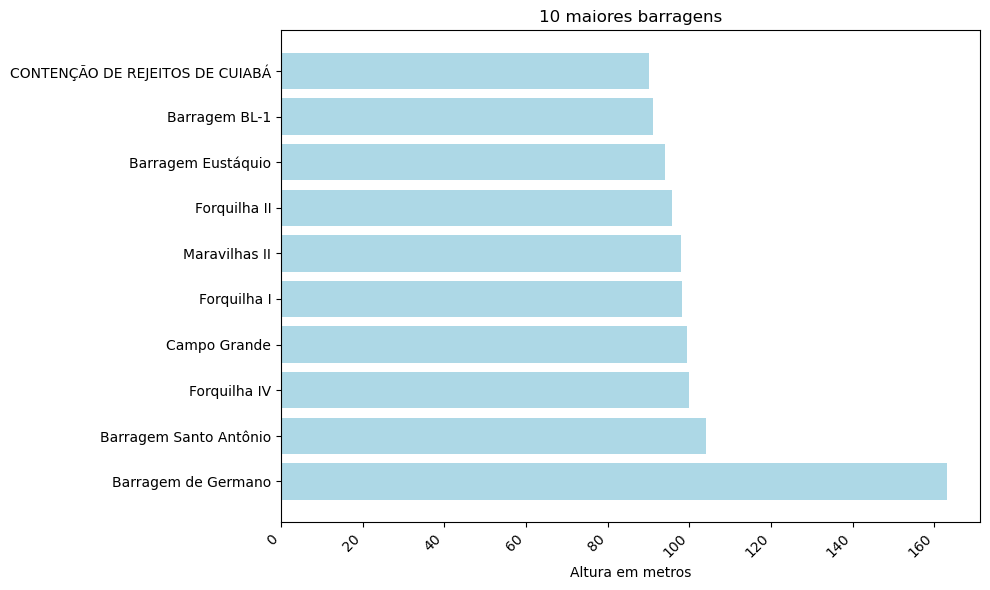

In [156]:
barragens = df_maiores['NOME_BARRAGEM_MINERACAO']
alt = df_maiores['ALTURA_ATUAL_metros']
vol = df_maiores['VOLUME_ATUAL_m3']

plt.figure(figsize=(10,6))
plt.barh(barragens, alt, color='lightblue')
plt.xlabel('Altura em metros')
plt.title('10 maiores barragens')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('Maiores.png')

In [153]:
query = '''SELECT UF , count (*) as total_barragens
FROM df
GROUP BY UF
ORDER BY total_barragens'''

dis_bar = ps.sqldf(query,locals())
dis_bar

,UF,total_barragens
0,ES,1
1,PB,1
2,PI,2
3,MA,3
4,PR,3
5,RJ,3
6,SE,3
7,RS,5
8,TO,6
9,SC,11


<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'UF')

Text(0, 0.5, 'Total')

Text(0.5, 1.0, 'Concentração de barragens por UF')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'ES'),
  Text(1, 0, 'PB'),
  Text(2, 0, 'PI'),
  Text(3, 0, 'MA'),
  Text(4, 0, 'PR'),
  Text(5, 0, 'RJ'),
  Text(6, 0, 'SE'),
  Text(7, 0, 'RS'),
  Text(8, 0, 'TO'),
  Text(9, 0, 'SC'),
  Text(10, 0, 'AP'),
  Text(11, 0, 'GO'),
  Text(12, 0, 'AM'),
  Text(13, 0, 'MS'),
  Text(14, 0, 'RO'),
  Text(15, 0, 'BA'),
  Text(16, 0, 'MT'),
  Text(17, 0, 'SP'),
  Text(18, 0, 'PA'),
  Text(19, 0, 'MG')])

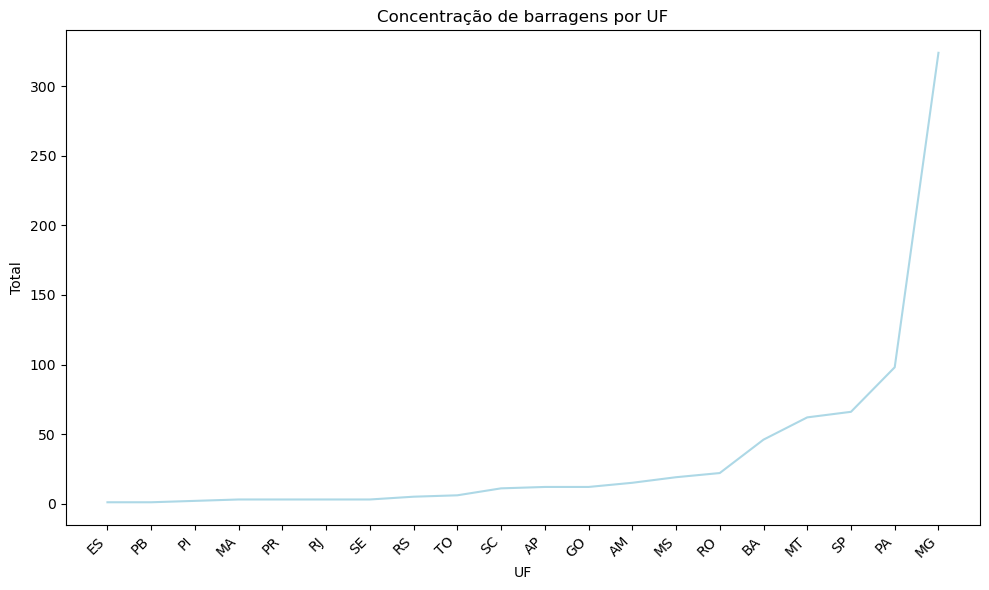

In [157]:
total = dis_bar['total_barragens']
uf = dis_bar['UF']

plt.figure(figsize=(10,6))
plt.plot(uf, total, color='lightblue')
plt.xlabel('UF')
plt.ylabel('Total')
plt.title('Concentração de barragens por UF')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('distribuicao.png')